# RADAR 2A product

In this tutorial, we will provide the foundations to use GPM-API to download, manipulate and analyze data from the Global Precipitation Measurement (GPM) 2A radar products.

Please note that GPM-API also enable access and analysis tools for the entire GPM constellation of passive microwave sensors as well as the IMERG precipitation products.
For detailed information and additional tutorials, please refer to the others [GPM-API tutorials](https://gpm-api.readthedocs.io/en/latest/04_tutorials.html).


First, let's import the package required in this tutorial.

In [ ]:
import datetime

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import ximage  # noqa

import gpm
from gpm.utils.geospatial import (
    get_circle_coordinates_around_point,
    get_country_extent,
    get_geographic_extent_around_point,
)

Using the `available_products` function, users can obtain a list of all GPM products that can be downloaded and opened into CF-compliant xarray datasets.

In [ ]:
gpm.available_products(product_types="RS")  # research products

['1A-GMI',
 '1A-TMI',
 '1B-GMI',
 '1B-Ka',
 '1B-Ku',
 '1B-PR',
 '1B-TMI',
 '1C-AMSR2-GCOMW1',
 '1C-AMSRE-AQUA',
 '1C-AMSUB-NOAA15',
 '1C-AMSUB-NOAA16',
 '1C-AMSUB-NOAA17',
 '1C-ATMS-NOAA20',
 '1C-ATMS-NOAA21',
 '1C-ATMS-NPP',
 '1C-GMI',
 '1C-GMI-R',
 '1C-MHS-METOPA',
 '1C-MHS-METOPB',
 '1C-MHS-METOPC',
 '1C-MHS-NOAA18',
 '1C-MHS-NOAA19',
 '1C-SAPHIR-MT1',
 '1C-SSMI-F08',
 '1C-SSMI-F10',
 '1C-SSMI-F11',
 '1C-SSMI-F13',
 '1C-SSMI-F14',
 '1C-SSMI-F15',
 '1C-SSMIS-F16',
 '1C-SSMIS-F17',
 '1C-SSMIS-F18',
 '1C-SSMIS-F19',
 '1C-TMI',
 '2A-AMSR2-GCOMW1',
 '2A-AMSR2-GCOMW1-CLIM',
 '2A-AMSRE-AQUA-CLIM',
 '2A-AMSUB-NOAA15-CLIM',
 '2A-AMSUB-NOAA16-CLIM',
 '2A-AMSUB-NOAA17-CLIM',
 '2A-ATMS-NOAA20',
 '2A-ATMS-NOAA20-CLIM',
 '2A-ATMS-NOAA21',
 '2A-ATMS-NOAA21-CLIM',
 '2A-ATMS-NPP',
 '2A-ATMS-NPP-CLIM',
 '2A-DPR',
 '2A-ENV-DPR',
 '2A-ENV-Ka',
 '2A-ENV-Ku',
 '2A-ENV-PR',
 '2A-GMI',
 '2A-GMI-CLIM',
 '2A-GPM-SLH',
 '2A-Ka',
 '2A-Ku',
 '2A-MHS-METOPA',
 '2A-MHS-METOPA-CLIM',
 '2A-MHS-METOPB',
 '2A-MHS-MET

Let's have a look at the available 2A RADAR products:

In [ ]:
gpm.available_products(product_categories="RADAR", product_levels="2A")

['2A-DPR',
 '2A-ENV-DPR',
 '2A-ENV-Ka',
 '2A-ENV-Ku',
 '2A-ENV-PR',
 '2A-GPM-SLH',
 '2A-Ka',
 '2A-Ku',
 '2A-PR',
 '2A-TRMM-SLH']

In this tutorial, we will use the `2A-DPR` product which provides the GPM Dual-frequency Precipitation Radar (DPR) reflectivities and associated precipitation retrievals.

## 1. Download Data

Now let's download the 2A-DPR product over a couple of hours.

To download GPM data with GPM-API, you have to previously create a [NASA Earthdata](https://urs.earthdata.nasa.gov/) and/or [NASA PPS](https://registration.pps.eosdis.nasa.gov/registration/) account.
We provide a step-by-step guide on how to set up your accounts in the [official GPM-API documentation](https://gpm-api.readthedocs.io/en/latest/03_quickstart.html).

In [ ]:
# Specify the time period you are interested in
start_time = datetime.datetime.strptime("2023-08-20 20:00:00", "%Y-%m-%d %H:%M:%S")
end_time = datetime.datetime.strptime("2023-08-21 00:00:00", "%Y-%m-%d %H:%M:%S")
# Specify the product and product type
product = "2A-DPR"  # 2A-PR
product_type = "RS"
storage = "GES_DISC"
# Specify the version
version = 7

In [ ]:
# Download the data
gpm.download(
    product=product,
    product_type=product_type,
    version=version,
    start_time=start_time,
    end_time=end_time,
    storage=storage,
    force_download=False,
    verbose=True,
    progress_bar=True,
    check_integrity=False,
)

All the available GPM 2A-DPR product files are already on disk.


Once, the data are downloaded on disk, let's load the 2A-DPR product and look at the dataset structure.

## 2. Load Data

With GPM-API, the name granule is used to refer to a single file, while the name dataset is used to refer to a collection of granules.

GPM-API enables to open single or multiple granules into `xarray`, a software designed for working with labeled multi-dimensional arrays.

- The `gpm.open_granule_dataset(filepath)` opens a single `scan_mode` of a granule into a `xarray.Dataset` object by providing the path of the file of interest.
- The `gpm.open_granule_datatree(filepath)` opens all `scan_modes` of granule into a `xarray.DataTree` object by providing the path of the file of interest.
- The `gpm.open_dataset` and `gpm.open_datatree` functions enable to open a collection of granules over a period of interest  into `xarray.Dataset` and `xarray.DataTree` objects respectively.

In [ ]:
# Load the 2A-DPR dataset
ds = gpm.open_dataset(
    product=product,
    product_type=product_type,
    version=version,
    start_time=start_time,
    end_time=end_time,
)
ds

'scan_mode' has not been specified. Default to FS.


<xarray.Dataset> Size: 14GB
Dimensions:                       (cross_track: 49, along_track: 20573,
                                   nfreqHI: 3, range: 176, nNode: 5,
                                   nbinSZP: 7, radar_frequency: 2, nNUBF: 3,
                                   method: 6, three: 3, foreBack: 2,
                                   nearFar: 2, nsdew: 3, four: 4, nNP: 4,
                                   XYZ: 3, DSD_params: 2)
Coordinates: (12/16)
    sunLocalTime                  (cross_track, along_track) float32 4MB dask.array<chunksize=(49, 614), meta=np.ndarray>
    height                        (cross_track, along_track, range) float32 710MB dask.array<chunksize=(49, 614, 176), meta=np.ndarray>
    dataQuality                   (along_track, radar_frequency) float32 165kB dask.array<chunksize=(614, 2), meta=np.ndarray>
    SCorientation                 (along_track) float32 82kB dask.array<chunksize=(614,), meta=np.ndarray>
    lon                           (cross_track, along_track) float32 4MB 117....
    lat                           (cross_track, along_track) float32 4MB -52....
    ...                            ...
    gpm_along_track_id            (along_track) int64 165kB ...
  * range                         (range) int64 1kB 1 2 3 4 ... 173 174 175 176
    gpm_range_id                  (range) int64 1kB ...
  * radar_frequency               (radar_frequency) <U2 16B 'Ku' 'Ka'
  * DSD_params                    (DSD_params) <U2 16B 'Nw' 'Dm'
    crsWGS84                      int64 8B 0
Dimensions without coordinates: cross_track, along_track, nfreqHI, nNode,
                                nbinSZP, nNUBF, method, three, foreBack,
                                nearFar, nsdew, four, nNP, XYZ
Data variables: (12/139)
    flagBB                        (cross_track, along_track) float64 8MB dask.array<chunksize=(49, 614), meta=np.ndarray>
    binBBPeak                     (cross_track, along_track) float32 4MB dask.array<chunksize=(49, 614), meta=np.ndarray>
    binBBTop                      (cross_track, along_track) float32 4MB dask.array<chunksize=(49, 614), meta=np.ndarray>
    binDFRmMLBottom               (cross_track, along_track) float32 4MB dask.array<chunksize=(49, 614), meta=np.ndarray>
    binDFRmMLTop                  (cross_track, along_track) float32 4MB dask.array<chunksize=(49, 614), meta=np.ndarray>
    binBBBottom                   (cross_track, along_track) float32 4MB dask.array<chunksize=(49, 614), meta=np.ndarray>
    ...                            ...
    precipWaterIntegrated_Liquid  (cross_track, along_track) float32 4MB dask.array<chunksize=(49, 614), meta=np.ndarray>
    precipWaterIntegrated_Solid   (cross_track, along_track) float32 4MB dask.array<chunksize=(49, 614), meta=np.ndarray>
    precipWaterIntegrated         (cross_track, along_track) float32 4MB dask.array<chunksize=(49, 614), meta=np.ndarray>
    dBNw                          (cross_track, along_track, range) float32 710MB dask.array<chunksize=(49, 614, 176), meta=np.ndarray>
    Dm                            (cross_track, along_track, range) float32 710MB dask.array<chunksize=(49, 614, 176), meta=np.ndarray>
    Nw                            (cross_track, along_track, range) float32 710MB dask.array<chunksize=(49, 614, 176), meta=np.ndarray>
Attributes: (12/23)
    FileName:              2A.GPM.DPR.V9-20211125.20230820-S183436-E200708.05...
    EphemerisFileName:     
    AttitudeFileName:      
    TotalQualityCode:      Good
    DielectricFactorKa:    0.8989
    DielectricFactorKu:    0.9255
    ...                    ...
    DataFormatVersion:     7h
    MetadataVersion:       7h
    ProcessingMode:        STD
    ScanMode:              FS
    history:               Created by ghiggi/gpm_api software on 2025-03-01 2...
    gpm_api_product:       2A-DPR

By default, GPM-API loads the `FS` scan mode for the 2A-DPR product.

If you want to load another scan_mode, first have a look at the available ones:

In [ ]:
gpm.available_scan_modes(product=product, version=version)

['FS', 'HS']

and then specify the scan_mode argument in open_dataset:

In [ ]:
ds = gpm.open_dataset(
    product=product,
    product_type=product_type,
    version=version,
    start_time=start_time,
    end_time=end_time,
    scan_mode="FS",
)
ds

<xarray.Dataset> Size: 14GB
Dimensions:                       (cross_track: 49, along_track: 20573,
                                   nfreqHI: 3, range: 176, nNode: 5,
                                   nbinSZP: 7, radar_frequency: 2, nNUBF: 3,
                                   method: 6, three: 3, foreBack: 2,
                                   nearFar: 2, nsdew: 3, four: 4, nNP: 4,
                                   XYZ: 3, DSD_params: 2)
Coordinates: (12/16)
    sunLocalTime                  (cross_track, along_track) float32 4MB dask.array<chunksize=(49, 614), meta=np.ndarray>
    height                        (cross_track, along_track, range) float32 710MB dask.array<chunksize=(49, 614, 176), meta=np.ndarray>
    dataQuality                   (along_track, radar_frequency) float32 165kB dask.array<chunksize=(614, 2), meta=np.ndarray>
    SCorientation                 (along_track) float32 82kB dask.array<chunksize=(614,), meta=np.ndarray>
    lon                           (cross_track, along_track) float32 4MB 117....
    lat                           (cross_track, along_track) float32 4MB -52....
    ...                            ...
    gpm_along_track_id            (along_track) int64 165kB ...
  * range                         (range) int64 1kB 1 2 3 4 ... 173 174 175 176
    gpm_range_id                  (range) int64 1kB ...
  * radar_frequency               (radar_frequency) <U2 16B 'Ku' 'Ka'
  * DSD_params                    (DSD_params) <U2 16B 'Nw' 'Dm'
    crsWGS84                      int64 8B 0
Dimensions without coordinates: cross_track, along_track, nfreqHI, nNode,
                                nbinSZP, nNUBF, method, three, foreBack,
                                nearFar, nsdew, four, nNP, XYZ
Data variables: (12/139)
    flagBB                        (cross_track, along_track) float64 8MB dask.array<chunksize=(49, 614), meta=np.ndarray>
    binBBPeak                     (cross_track, along_track) float32 4MB dask.array<chunksize=(49, 614), meta=np.ndarray>
    binBBTop                      (cross_track, along_track) float32 4MB dask.array<chunksize=(49, 614), meta=np.ndarray>
    binDFRmMLBottom               (cross_track, along_track) float32 4MB dask.array<chunksize=(49, 614), meta=np.ndarray>
    binDFRmMLTop                  (cross_track, along_track) float32 4MB dask.array<chunksize=(49, 614), meta=np.ndarray>
    binBBBottom                   (cross_track, along_track) float32 4MB dask.array<chunksize=(49, 614), meta=np.ndarray>
    ...                            ...
    precipWaterIntegrated_Liquid  (cross_track, along_track) float32 4MB dask.array<chunksize=(49, 614), meta=np.ndarray>
    precipWaterIntegrated_Solid   (cross_track, along_track) float32 4MB dask.array<chunksize=(49, 614), meta=np.ndarray>
    precipWaterIntegrated         (cross_track, along_track) float32 4MB dask.array<chunksize=(49, 614), meta=np.ndarray>
    dBNw                          (cross_track, along_track, range) float32 710MB dask.array<chunksize=(49, 614, 176), meta=np.ndarray>
    Dm                            (cross_track, along_track, range) float32 710MB dask.array<chunksize=(49, 614, 176), meta=np.ndarray>
    Nw                            (cross_track, along_track, range) float32 710MB dask.array<chunksize=(49, 614, 176), meta=np.ndarray>
Attributes: (12/23)
    FileName:              2A.GPM.DPR.V9-20211125.20230820-S183436-E200708.05...
    EphemerisFileName:     
    AttitudeFileName:      
    TotalQualityCode:      Good
    DielectricFactorKa:    0.8989
    DielectricFactorKu:    0.9255
    ...                    ...
    DataFormatVersion:     7h
    MetadataVersion:       7h
    ProcessingMode:        STD
    ScanMode:              FS
    history:               Created by ghiggi/gpm_api software on 2025-03-01 2...
    gpm_api_product:       2A-DPR

If you are interested to work only with a specific subset of variables, you can specify their names using the `variables` argument in `gpm.open_dataset` function.

In [ ]:
ds1 = gpm.open_dataset(
    product=product,
    product_type=product_type,
    version=version,
    start_time=start_time,
    end_time=end_time,
    variables=["zFactorFinal", "zFactorMeasured"],
    scan_mode="FS",
)
ds1

## 3. Basic Manipulations

You can list variables, coordinates and dimensions with the following methods:

In [ ]:
# Available variables
print("Available variables: ", list(ds.data_vars))
# Available coordinates
print("Available coordinates: ", list(ds.coords))
# Available dimensions
print("Available dimensions: ", list(ds.dims))
# Spatial dimension:
print("Spatial dimensions: ", ds.gpm.spatial_dimensions)
# Vertical dimension:
print("Vertical dimension: ", ds.gpm.vertical_dimension)

Available variables:  ['flagBB', 'binBBPeak', 'binBBTop', 'binDFRmMLBottom', 'binDFRmMLTop', 'binBBBottom', 'binHeavyIcePrecipTop', 'binHeavyIcePrecipBottom', 'nHeavyIcePrecip', 'flagMLquality', 'heightBB', 'widthBB', 'qualityBB', 'typePrecip', 'qualityTypePrecip', 'flagShallowRain', 'flagHeavyIcePrecip', 'flagAnvil', 'flagHail', 'phase', 'binNode', 'paramRDm', 'precipRateESurface2', 'precipRateESurface2Status', 'sigmaZeroProfile', 'seaIceConcentration', 'flagSurfaceSnowfall', 'flagGraupelHail', 'binMixedPhaseTop', 'surfaceSnowfallIndex', 'flagEcho', 'qualityData', 'qualityFlag', 'flagSensor', 'flagScanPattern', 'elevation', 'landSurfaceType', 'localZenithAngle', 'flagPrecip', 'flagSigmaZeroSaturation', 'binRealSurface', 'binStormTop', 'heightStormTop', 'binClutterFreeBottom', 'sigmaZeroMeasured', 'zFactorMeasured', 'ellipsoidBinOffset', 'snRatioAtRealSurface', 'adjustFactor', 'snowIceCover', 'binMirrorImageL2', 'echoCountRealSurface', 'flagSLV', 'binEchoBottom', 'piaFinal', 'sigmaZero

Through the use of the xarray `gpm` accessor, you can access various methods that simplify for example the listing of variables according to their dimensions.

For example, using `ds.gpm.spatial_3d_variables` you can list all dataset variables with spatial horizontal and vertical dimensions, while with 
`ds.gpm.spatial_2d_variables` you can list all dataset variables with only spatial horizontal dimensions. 

To directly obtain a dataset with the variables of interest, you can also call the `ds.gpm.select_spatial_2d_variables` or `ds.gpm.select_spatial_3d_variables`  methods.

Please keep in mind that to create a spatial map, it is necessary to select spatial 2D variables, while for extracting vertical cross-sections it is necessary to slice across spatial 3D variables.

In [ ]:
print(ds.gpm.spatial_2d_variables)
ds.gpm.select_spatial_2d_variables()

['MSindex', 'MSindexKa', 'MSindexKu', 'MSkneeDFRindex', 'MSslopesKa', 'MSslopesKu', 'MSsurfPeakIndexKa', 'MSsurfPeakIndexKu', 'NUBFindex', 'PIAalt', 'PIAdw', 'PIAhb', 'PIAhybrid', 'PIAweight', 'PIAweightHY', 'RFactorAlt', 'adjustFactor', 'binBBBottom', 'binBBPeak', 'binBBTop', 'binClutterFreeBottom', 'binDFRmMLBottom', 'binDFRmMLTop', 'binEchoBottom', 'binHeavyIcePrecipBottom', 'binHeavyIcePrecipTop', 'binMirrorImageL2', 'binMixedPhaseTop', 'binNode', 'binRealSurface', 'binStormTop', 'binZeroDeg', 'binZeroDegSecondary', 'echoCountRealSurface', 'elevation', 'ellipsoidBinOffset', 'flagAnvil', 'flagBB', 'flagGraupelHail', 'flagHail', 'flagHeavyIcePrecip', 'flagInversion', 'flagMLquality', 'flagPrecip', 'flagShallowRain', 'flagSigmaZeroSaturation', 'flagSurfaceSnowfall', 'heightBB', 'heightStormTop', 'heightZeroDeg', 'landSurfaceType', 'localZenithAngle', 'nHeavyIcePrecip', 'paramNUBF', 'paramRDm', 'pathAtten', 'phaseNearSurface', 'piaExp', 'piaFinal', 'piaNP', 'piaNPrainFree', 'piaOffset'

<xarray.Dataset> Size: 864MB
Dimensions:                       (cross_track: 49, along_track: 20573,
                                   four: 4, method: 6, radar_frequency: 2,
                                   three: 3, nfreqHI: 3, nNode: 5, nNUBF: 3,
                                   nNP: 4, foreBack: 2, nearFar: 2, nbinSZP: 7,
                                   nsdew: 3)
Coordinates:
    sunLocalTime                  (cross_track, along_track) float32 4MB dask.array<chunksize=(49, 614), meta=np.ndarray>
    dataQuality                   (along_track, radar_frequency) float32 165kB dask.array<chunksize=(614, 2), meta=np.ndarray>
    SCorientation                 (along_track) float32 82kB dask.array<chunksize=(614,), meta=np.ndarray>
    lon                           (cross_track, along_track) float32 4MB 117....
    lat                           (cross_track, along_track) float32 4MB -52....
    time                          (along_track) datetime64[ns] 165kB 2023-08-...
    gpm_id                        (along_track) <U10 823kB ...
    gpm_granule_id                (along_track) int64 165kB ...
    gpm_cross_track_id            (cross_track) int64 392B ...
    gpm_along_track_id            (along_track) int64 165kB ...
  * radar_frequency               (radar_frequency) <U2 16B 'Ku' 'Ka'
    crsWGS84                      int64 8B 0
Dimensions without coordinates: cross_track, along_track, four, method, three,
                                nfreqHI, nNode, nNUBF, nNP, foreBack, nearFar,
                                nbinSZP, nsdew
Data variables: (12/95)
    MSindex                       (cross_track, along_track) float64 8MB dask.array<chunksize=(49, 614), meta=np.ndarray>
    MSindexKa                     (cross_track, along_track) float64 8MB dask.array<chunksize=(49, 614), meta=np.ndarray>
    MSindexKu                     (cross_track, along_track) float64 8MB dask.array<chunksize=(49, 614), meta=np.ndarray>
    MSkneeDFRindex                (cross_track, along_track) float64 8MB dask.array<chunksize=(49, 614), meta=np.ndarray>
    MSslopesKa                    (cross_track, along_track, four) float32 16MB dask.array<chunksize=(49, 614, 4), meta=np.ndarray>
    MSslopesKu                    (cross_track, along_track, four) float32 16MB dask.array<chunksize=(49, 614, 4), meta=np.ndarray>
    ...                            ...
    surfaceSnowfallIndex          (cross_track, along_track) float32 4MB dask.array<chunksize=(49, 614), meta=np.ndarray>
    typePrecip                    (cross_track, along_track) float64 8MB dask.array<chunksize=(49, 614), meta=np.ndarray>
    widthBB                       (cross_track, along_track) float32 4MB dask.array<chunksize=(49, 614), meta=np.ndarray>
    zFactorFinalESurface          (cross_track, along_track, radar_frequency) float32 8MB dask.array<chunksize=(49, 614, 2), meta=np.ndarray>
    zFactorFinalNearSurface       (cross_track, along_track, radar_frequency) float32 8MB dask.array<chunksize=(49, 614, 2), meta=np.ndarray>
    zeta                          (cross_track, along_track, radar_frequency) float32 8MB dask.array<chunksize=(49, 614, 2), meta=np.ndarray>
Attributes: (12/23)
    FileName:              2A.GPM.DPR.V9-20211125.20230820-S183436-E200708.05...
    EphemerisFileName:     
    AttitudeFileName:      
    TotalQualityCode:      Good
    DielectricFactorKa:    0.8989
    DielectricFactorKu:    0.9255
    ...                    ...
    DataFormatVersion:     7h
    MetadataVersion:       7h
    ProcessingMode:        STD
    ScanMode:              FS
    history:               Created by ghiggi/gpm_api software on 2025-03-01 2...
    gpm_api_product:       2A-DPR

In [ ]:
print(ds.gpm.spatial_3d_variables)
ds.gpm.select_spatial_3d_variables()

['DFRforward1', 'Dm', 'Nw', 'airTemperature', 'attenuationNP', 'dBNw', 'epsilon', 'flagEcho', 'flagSLV', 'phase', 'precipRate', 'precipWater', 'zFactorFinal', 'zFactorMeasured']


<xarray.Dataset> Size: 13GB
Dimensions:             (cross_track: 49, along_track: 20573, range: 176,
                         radar_frequency: 2)
Coordinates: (12/15)
    sunLocalTime        (cross_track, along_track) float32 4MB dask.array<chunksize=(49, 614), meta=np.ndarray>
    height              (cross_track, along_track, range) float32 710MB dask.array<chunksize=(49, 614, 176), meta=np.ndarray>
    dataQuality         (along_track, radar_frequency) float32 165kB dask.array<chunksize=(614, 2), meta=np.ndarray>
    SCorientation       (along_track) float32 82kB dask.array<chunksize=(614,), meta=np.ndarray>
    lon                 (cross_track, along_track) float32 4MB 117.4 ... -60.54
    lat                 (cross_track, along_track) float32 4MB -52.61 ... 63.39
    ...                  ...
    gpm_cross_track_id  (cross_track) int64 392B ...
    gpm_along_track_id  (along_track) int64 165kB ...
  * range               (range) int64 1kB 1 2 3 4 5 6 ... 172 173 174 175 176
    gpm_range_id        (range) int64 1kB ...
  * radar_frequency     (radar_frequency) <U2 16B 'Ku' 'Ka'
    crsWGS84            int64 8B 0
Dimensions without coordinates: cross_track, along_track
Data variables: (12/14)
    DFRforward1         (cross_track, along_track, range) float32 710MB dask.array<chunksize=(49, 614, 176), meta=np.ndarray>
    Dm                  (cross_track, along_track, range) float32 710MB dask.array<chunksize=(49, 614, 176), meta=np.ndarray>
    Nw                  (cross_track, along_track, range) float32 710MB dask.array<chunksize=(49, 614, 176), meta=np.ndarray>
    airTemperature      (cross_track, along_track, range) float32 710MB dask.array<chunksize=(49, 614, 176), meta=np.ndarray>
    attenuationNP       (cross_track, along_track, range, radar_frequency) float32 1GB dask.array<chunksize=(49, 614, 176, 2), meta=np.ndarray>
    dBNw                (cross_track, along_track, range) float32 710MB dask.array<chunksize=(49, 614, 176), meta=np.ndarray>
    ...                  ...
    flagSLV             (cross_track, along_track, range) float32 710MB dask.array<chunksize=(49, 614, 176), meta=np.ndarray>
    phase               (cross_track, along_track, range) float32 710MB dask.array<chunksize=(49, 614, 176), meta=np.ndarray>
    precipRate          (cross_track, along_track, range) float32 710MB dask.array<chunksize=(49, 614, 176), meta=np.ndarray>
    precipWater         (cross_track, along_track, range) float32 710MB dask.array<chunksize=(49, 614, 176), meta=np.ndarray>
    zFactorFinal        (cross_track, along_track, range, radar_frequency) float32 1GB dask.array<chunksize=(49, 614, 176, 2), meta=np.ndarray>
    zFactorMeasured     (cross_track, along_track, range, radar_frequency) float32 1GB dask.array<chunksize=(49, 614, 176, 2), meta=np.ndarray>
Attributes: (12/23)
    FileName:              2A.GPM.DPR.V9-20211125.20230820-S183436-E200708.05...
    EphemerisFileName:     
    AttitudeFileName:      
    TotalQualityCode:      Good
    DielectricFactorKa:    0.8989
    DielectricFactorKu:    0.9255
    ...                    ...
    DataFormatVersion:     7h
    MetadataVersion:       7h
    ProcessingMode:        STD
    ScanMode:              FS
    history:               Created by ghiggi/gpm_api software on 2025-03-01 2...
    gpm_api_product:       2A-DPR

Some variables also have a frequency dimension. You can list or subset such variables using `ds.gpm.frequency_variables` and `ds.gpm.'select_frequency_variables` respectively.

In [ ]:
print(ds.gpm.frequency_variables)
ds.gpm.select_frequency_variables()

['PIAalt', 'PIAdw', 'PIAhb', 'PIAhybrid', 'adjustFactor', 'attenuationNP', 'binRealSurface', 'dataWarning', 'echoCountRealSurface', 'flagScanPattern', 'flagSensor', 'flagSigmaZeroSaturation', 'geoError', 'geoWarning', 'limitErrorFlag', 'localZenithAngle', 'missing', 'modeStatus', 'operationalMode', 'pathAtten', 'piaExp', 'piaFinal', 'piaNP', 'piaNPrainFree', 'piaOffset', 'pointingStatus', 'qualityFlag', 'sigmaZeroCorrected', 'sigmaZeroMeasured', 'sigmaZeroNPCorrected', 'sigmaZeroProfile', 'snRatioAtRealSurface', 'stddevEff', 'stddevHY', 'zFactorFinal', 'zFactorFinalESurface', 'zFactorFinalNearSurface', 'zFactorMeasured', 'zeta']


<xarray.Dataset> Size: 5GB
Dimensions:                  (cross_track: 49, along_track: 20573, method: 6,
                              radar_frequency: 2, range: 176, nNP: 4,
                              nbinSZP: 7, nsdew: 3)
Coordinates: (12/15)
    sunLocalTime             (cross_track, along_track) float32 4MB dask.array<chunksize=(49, 614), meta=np.ndarray>
    height                   (cross_track, along_track, range) float32 710MB dask.array<chunksize=(49, 614, 176), meta=np.ndarray>
    dataQuality              (along_track, radar_frequency) float32 165kB dask.array<chunksize=(614, 2), meta=np.ndarray>
    SCorientation            (along_track) float32 82kB dask.array<chunksize=(614,), meta=np.ndarray>
    lon                      (cross_track, along_track) float32 4MB 117.4 ......
    lat                      (cross_track, along_track) float32 4MB -52.61 .....
    ...                       ...
    gpm_cross_track_id       (cross_track) int64 392B ...
    gpm_along_track_id       (along_track) int64 165kB ...
  * range                    (range) int64 1kB 1 2 3 4 5 ... 172 173 174 175 176
    gpm_range_id             (range) int64 1kB ...
  * radar_frequency          (radar_frequency) <U2 16B 'Ku' 'Ka'
    crsWGS84                 int64 8B 0
Dimensions without coordinates: cross_track, along_track, method, nNP, nbinSZP,
                                nsdew
Data variables: (12/39)
    PIAalt                   (cross_track, along_track, method, radar_frequency) float32 48MB dask.array<chunksize=(49, 614, 6, 2), meta=np.ndarray>
    PIAdw                    (cross_track, along_track, radar_frequency) float32 8MB dask.array<chunksize=(49, 614, 2), meta=np.ndarray>
    PIAhb                    (cross_track, along_track, radar_frequency) float32 8MB dask.array<chunksize=(49, 614, 2), meta=np.ndarray>
    PIAhybrid                (cross_track, along_track, radar_frequency) float32 8MB dask.array<chunksize=(49, 614, 2), meta=np.ndarray>
    adjustFactor             (cross_track, along_track, radar_frequency) float32 8MB dask.array<chunksize=(49, 614, 2), meta=np.ndarray>
    attenuationNP            (cross_track, along_track, range, radar_frequency) float32 1GB dask.array<chunksize=(49, 614, 176, 2), meta=np.ndarray>
    ...                       ...
    stddevHY                 (cross_track, along_track, radar_frequency) float32 8MB dask.array<chunksize=(49, 614, 2), meta=np.ndarray>
    zFactorFinal             (cross_track, along_track, range, radar_frequency) float32 1GB dask.array<chunksize=(49, 614, 176, 2), meta=np.ndarray>
    zFactorFinalESurface     (cross_track, along_track, radar_frequency) float32 8MB dask.array<chunksize=(49, 614, 2), meta=np.ndarray>
    zFactorFinalNearSurface  (cross_track, along_track, radar_frequency) float32 8MB dask.array<chunksize=(49, 614, 2), meta=np.ndarray>
    zFactorMeasured          (cross_track, along_track, range, radar_frequency) float32 1GB dask.array<chunksize=(49, 614, 176, 2), meta=np.ndarray>
    zeta                     (cross_track, along_track, radar_frequency) float32 8MB dask.array<chunksize=(49, 614, 2), meta=np.ndarray>
Attributes: (12/23)
    FileName:              2A.GPM.DPR.V9-20211125.20230820-S183436-E200708.05...
    EphemerisFileName:     
    AttitudeFileName:      
    TotalQualityCode:      Good
    DielectricFactorKa:    0.8989
    DielectricFactorKu:    0.9255
    ...                    ...
    DataFormatVersion:     7h
    MetadataVersion:       7h
    ProcessingMode:        STD
    ScanMode:              FS
    history:               Created by ghiggi/gpm_api software on 2025-03-01 2...
    gpm_api_product:       2A-DPR

Using the `ds.gpm.bin_variables` or `ds.gpm.select_bin_variables` you can instead list or select the variables that contains "pointers" to specific radar gates. 
The bin variables are useful to slice or extract data across the "range" dimension of the dataset.
Bin variables values range from 1 (the ellipsoid surface) to the size of the `range` dimension (in the upper atmosphere). 

In [ ]:
print(ds.gpm.bin_variables)
ds.gpm.select_bin_variables()

['binBBBottom', 'binBBPeak', 'binBBTop', 'binClutterFreeBottom', 'binDFRmMLBottom', 'binDFRmMLTop', 'binEchoBottom', 'binHeavyIcePrecipBottom', 'binHeavyIcePrecipTop', 'binMirrorImageL2', 'binMixedPhaseTop', 'binNode', 'binRealSurface', 'binStormTop', 'binZeroDeg', 'binZeroDegSecondary']


<xarray.Dataset> Size: 114MB
Dimensions:                  (cross_track: 49, along_track: 20573, nfreqHI: 3,
                              nNode: 5, radar_frequency: 2)
Coordinates:
    sunLocalTime             (cross_track, along_track) float32 4MB dask.array<chunksize=(49, 614), meta=np.ndarray>
    dataQuality              (along_track, radar_frequency) float32 165kB dask.array<chunksize=(614, 2), meta=np.ndarray>
    SCorientation            (along_track) float32 82kB dask.array<chunksize=(614,), meta=np.ndarray>
    lon                      (cross_track, along_track) float32 4MB 117.4 ......
    lat                      (cross_track, along_track) float32 4MB -52.61 .....
    time                     (along_track) datetime64[ns] 165kB 2023-08-20T20...
    gpm_id                   (along_track) <U10 823kB ...
    gpm_granule_id           (along_track) int64 165kB ...
    gpm_cross_track_id       (cross_track) int64 392B ...
    gpm_along_track_id       (along_track) int64 165kB ...
  * radar_frequency          (radar_frequency) <U2 16B 'Ku' 'Ka'
    crsWGS84                 int64 8B 0
Dimensions without coordinates: cross_track, along_track, nfreqHI, nNode
Data variables: (12/16)
    binBBBottom              (cross_track, along_track) float32 4MB dask.array<chunksize=(49, 614), meta=np.ndarray>
    binBBPeak                (cross_track, along_track) float32 4MB dask.array<chunksize=(49, 614), meta=np.ndarray>
    binBBTop                 (cross_track, along_track) float32 4MB dask.array<chunksize=(49, 614), meta=np.ndarray>
    binClutterFreeBottom     (cross_track, along_track) float32 4MB dask.array<chunksize=(49, 614), meta=np.ndarray>
    binDFRmMLBottom          (cross_track, along_track) float32 4MB dask.array<chunksize=(49, 614), meta=np.ndarray>
    binDFRmMLTop             (cross_track, along_track) float32 4MB dask.array<chunksize=(49, 614), meta=np.ndarray>
    ...                       ...
    binMixedPhaseTop         (cross_track, along_track) float32 4MB dask.array<chunksize=(49, 614), meta=np.ndarray>
    binNode                  (cross_track, along_track, nNode) float32 20MB dask.array<chunksize=(49, 614, 5), meta=np.ndarray>
    binRealSurface           (cross_track, along_track, radar_frequency) float32 8MB dask.array<chunksize=(49, 614, 2), meta=np.ndarray>
    binStormTop              (cross_track, along_track) float32 4MB dask.array<chunksize=(49, 614), meta=np.ndarray>
    binZeroDeg               (cross_track, along_track) float32 4MB dask.array<chunksize=(49, 614), meta=np.ndarray>
    binZeroDegSecondary      (cross_track, along_track) float32 4MB dask.array<chunksize=(49, 614), meta=np.ndarray>
Attributes: (12/23)
    FileName:              2A.GPM.DPR.V9-20211125.20230820-S183436-E200708.05...
    EphemerisFileName:     
    AttitudeFileName:      
    TotalQualityCode:      Good
    DielectricFactorKa:    0.8989
    DielectricFactorKu:    0.9255
    ...                    ...
    DataFormatVersion:     7h
    MetadataVersion:       7h
    ProcessingMode:        STD
    ScanMode:              FS
    history:               Created by ghiggi/gpm_api software on 2025-03-01 2...
    gpm_api_product:       2A-DPR

To select the DataArray corresponding to a single variable you do:

In [ ]:
variable = "precipRateNearSurface"
da = ds[variable]
print("Array class: ", type(da.data))
da

 Array Class:  <class 'dask.array.core.Array'>


<xarray.DataArray 'precipRateNearSurface' (cross_track: 49, along_track: 20573)> Size: 4MB
dask.array<getitem, shape=(49, 20573), dtype=float32, chunksize=(49, 7933), chunktype=numpy.ndarray>
Coordinates:
    sunLocalTime        (cross_track, along_track) float32 4MB dask.array<chunksize=(49, 614), meta=np.ndarray>
    SCorientation       (along_track) float32 82kB dask.array<chunksize=(614,), meta=np.ndarray>
    lon                 (cross_track, along_track) float32 4MB 117.4 ... -60.54
    lat                 (cross_track, along_track) float32 4MB -52.61 ... 63.39
    time                (along_track) datetime64[ns] 165kB 2023-08-20T20:00:0...
    gpm_id              (along_track) <U10 823kB ...
    gpm_granule_id      (along_track) int64 165kB ...
    gpm_cross_track_id  (cross_track) int64 392B ...
    gpm_along_track_id  (along_track) int64 165kB ...
    crsWGS84            int64 8B 0
Dimensions without coordinates: cross_track, along_track
Attributes:
    units:            mm/hr
    gpm_api_product:  2A-DPR
    grid_mapping:     crsWGS84

If the array class is `dask.Array`, it means that the data are not yet loaded into RAM memory. 
To put the data into memory, you need to call the method `compute`, either on the xarray object or on the numerical array.

In [ ]:
da = da.compute()
print("Array class: ", type(da.data))
da

Array Class:  <class 'numpy.ndarray'>


<xarray.DataArray 'precipRateNearSurface' (cross_track: 49, along_track: 20573)> Size: 4MB
array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.3231746, 0.       , ..., 0.       , 0.       ,
        0.       ]], dtype=float32)
Coordinates:
    sunLocalTime        (cross_track, along_track) float32 4MB 3.768 ... 19.91
    SCorientation       (along_track) float32 82kB 0.0 0.0 0.0 ... 0.0 0.0 0.0
    lon                 (cross_track, along_track) float32 4MB 117.4 ... -60.54
    lat                 (cross_track, along_track) float32 4MB -52.61 ... 63.39
    time                (along_track) datetime64[ns] 165kB 2023-08-20T20:00:0...
    gpm_id              (along_track) <U10 823kB '53845-7319' ... '53848-4093'
    gpm_granule_id      (along_track) int64 165kB 53845 53845 ... 53848 53848
    gpm_cross_track_id  (cross_track) int64 392B 0 1 2 3 4 5 ... 44 45 46 47 48
    gpm_along_track_id  (along_track) int64 165kB 7319 7320 7321 ... 4092 4093
    crsWGS84            int64 8B 0
Dimensions without coordinates: cross_track, along_track
Attributes:
    units:            mm/hr
    gpm_api_product:  2A-DPR
    grid_mapping:     crsWGS84

To check if the Dataset or the DataArray you selected has only spatial horizontal and/or vertical dimensions, you can use the xarray accessor `gpm.is_spatial_2d` and `gpm.is_spatial_3d` properties.  

In [ ]:
print(
    ds.gpm.is_spatial_2d,
)  # False because the xarray.Dataset also contains the range and frequency dimensions !
print(
    ds.gpm.is_spatial_3d,
)  # False because the xarray.Dataset also contains frequency dimensions !

False
False


In [ ]:
print(
    ds["zFactorFinal"].isel(range=0).sel(radar_frequency="Ka").gpm.is_spatial_2d,
)  # True
print(ds["precipRateNearSurface"].gpm.is_spatial_2d)

True
True


You can select the reflectivity volumes at a given frequency using the radar band name with the `sel` method:

In [ ]:
ds["zFactorFinal"].sel(radar_frequency="Ka")

<xarray.DataArray 'zFactorFinal' (cross_track: 49, along_track: 20573,
                                  range: 176)> Size: 710MB
dask.array<getitem, shape=(49, 20573, 176), dtype=float32, chunksize=(49, 7933, 176), chunktype=numpy.ndarray>
Coordinates: (12/15)
    sunLocalTime        (cross_track, along_track) float32 4MB dask.array<chunksize=(49, 614), meta=np.ndarray>
    height              (cross_track, along_track, range) float32 710MB dask.array<chunksize=(49, 614, 176), meta=np.ndarray>
    dataQuality         (along_track) float32 82kB dask.array<chunksize=(614,), meta=np.ndarray>
    SCorientation       (along_track) float32 82kB dask.array<chunksize=(614,), meta=np.ndarray>
    lon                 (cross_track, along_track) float32 4MB 117.4 ... -60.54
    lat                 (cross_track, along_track) float32 4MB -52.61 ... 63.39
    ...                  ...
    gpm_cross_track_id  (cross_track) int64 392B ...
    gpm_along_track_id  (along_track) int64 165kB ...
  * range               (range) int64 1kB 1 2 3 4 5 6 ... 172 173 174 175 176
    gpm_range_id        (range) int64 1kB ...
    radar_frequency     <U2 8B 'Ka'
    crsWGS84            int64 8B 0
Dimensions without coordinates: cross_track, along_track
Attributes:
    units:            dBZ
    gpm_api_product:  2A-DPR
    grid_mapping:     crsWGS84

Since xarray does not yet allow subsetting by value along non-dimensional coordinates, the `gpm.sel` method provides you this functionality.

As an example, you can subset the dataset by time:

In [ ]:
start_time = datetime.datetime.strptime("2023-08-20 22:12:00", "%Y-%m-%d %H:%M:%S")
end_time = datetime.datetime.strptime("2023-08-20 22:13:45", "%Y-%m-%d %H:%M:%S")
ds_subset = ds.gpm.sel(time=slice(start_time, end_time))
ds_subset["time"]

<xarray.DataArray 'time' (along_track: 151)> Size: 1kB
array(['2023-08-20T22:12:00.000000000', '2023-08-20T22:12:01.000000000',
       '2023-08-20T22:12:01.000000000', '2023-08-20T22:12:02.000000000',
       '2023-08-20T22:12:03.000000000', '2023-08-20T22:12:04.000000000',
       '2023-08-20T22:12:04.000000000', '2023-08-20T22:12:05.000000000',
       '2023-08-20T22:12:06.000000000', '2023-08-20T22:12:06.000000000',
       '2023-08-20T22:12:07.000000000', '2023-08-20T22:12:08.000000000',
       '2023-08-20T22:12:08.000000000', '2023-08-20T22:12:09.000000000',
       '2023-08-20T22:12:10.000000000', '2023-08-20T22:12:11.000000000',
       '2023-08-20T22:12:11.000000000', '2023-08-20T22:12:12.000000000',
       '2023-08-20T22:12:13.000000000', '2023-08-20T22:12:13.000000000',
       '2023-08-20T22:12:14.000000000', '2023-08-20T22:12:15.000000000',
       '2023-08-20T22:12:15.000000000', '2023-08-20T22:12:16.000000000',
       '2023-08-20T22:12:17.000000000', '2023-08-20T22:12:18.000000000',
       '2023-08-20T22:12:18.000000000', '2023-08-20T22:12:19.000000000',
       '2023-08-20T22:12:20.000000000', '2023-08-20T22:12:20.000000000',
       '2023-08-20T22:12:21.000000000', '2023-08-20T22:12:22.000000000',
       '2023-08-20T22:12:22.000000000', '2023-08-20T22:12:23.000000000',
       '2023-08-20T22:12:24.000000000', '2023-08-20T22:12:25.000000000',
       '2023-08-20T22:12:25.000000000', '2023-08-20T22:12:26.000000000',
       '2023-08-20T22:12:27.000000000', '2023-08-20T22:12:27.000000000',
...
       '2023-08-20T22:13:18.000000000', '2023-08-20T22:13:19.000000000',
       '2023-08-20T22:13:20.000000000', '2023-08-20T22:13:21.000000000',
       '2023-08-20T22:13:21.000000000', '2023-08-20T22:13:22.000000000',
       '2023-08-20T22:13:23.000000000', '2023-08-20T22:13:23.000000000',
       '2023-08-20T22:13:24.000000000', '2023-08-20T22:13:25.000000000',
       '2023-08-20T22:13:25.000000000', '2023-08-20T22:13:26.000000000',
       '2023-08-20T22:13:27.000000000', '2023-08-20T22:13:28.000000000',
       '2023-08-20T22:13:28.000000000', '2023-08-20T22:13:29.000000000',
       '2023-08-20T22:13:30.000000000', '2023-08-20T22:13:30.000000000',
       '2023-08-20T22:13:31.000000000', '2023-08-20T22:13:32.000000000',
       '2023-08-20T22:13:32.000000000', '2023-08-20T22:13:33.000000000',
       '2023-08-20T22:13:34.000000000', '2023-08-20T22:13:35.000000000',
       '2023-08-20T22:13:35.000000000', '2023-08-20T22:13:36.000000000',
       '2023-08-20T22:13:37.000000000', '2023-08-20T22:13:37.000000000',
       '2023-08-20T22:13:38.000000000', '2023-08-20T22:13:39.000000000',
       '2023-08-20T22:13:39.000000000', '2023-08-20T22:13:40.000000000',
       '2023-08-20T22:13:41.000000000', '2023-08-20T22:13:42.000000000',
       '2023-08-20T22:13:42.000000000', '2023-08-20T22:13:43.000000000',
       '2023-08-20T22:13:44.000000000', '2023-08-20T22:13:44.000000000',
       '2023-08-20T22:13:45.000000000'], dtype='datetime64[ns]')
Coordinates:
    SCorientation       (along_track) float32 604B dask.array<chunksize=(151,), meta=np.ndarray>
    time                (along_track) datetime64[ns] 1kB 2023-08-20T22:12:00 ...
    gpm_id              (along_track) <U10 6kB ...
    gpm_granule_id      (along_track) int64 1kB ...
    gpm_along_track_id  (along_track) int64 1kB ...
    crsWGS84            int64 8B 0
Dimensions without coordinates: along_track
Attributes:
    standard_name:          time
    coverage_content_type:  coordinate
    axis:                   T

Remember that you can get the start time and end time of your GPM xarray object with the gpm accessor methods `start_time` and `end_time`.

In [ ]:
print(ds_subset.gpm.start_time)
print(ds_subset.gpm.end_time)

2023-08-20 22:12:00
2023-08-20 22:13:45


You can also subset your GPM xarray object by `gpm_id`, `gpm_cross_track_id` or `gpm_range_id` coordinates, which act as reference identifiers for the along-track, cross-track and range dimensions. 
Selecting across coordinates by value is useful for example to:
- align multiple GPM xarray objects that might have been subsetted differently across the `cross_track`, `along_track` or `range` dimensions. 
- to retrieve a specific portion of a GPM granule indipendently of the previous subsetting operations. 
 
The `gpm_id` is defined as `<gpm_granule_number>-<gpm_along_track_id>`, while the others <gpm_*_id> coordinates start at 0 and increase incrementally by 1 along each granule dimension. 

In [ ]:
# Subset by gpm_id
start_gpm_id = "53847-2768"
end_gpm_id = "53847-2918"
ds_subset = ds.gpm.sel(gpm_id=slice(start_gpm_id, end_gpm_id))
ds_subset["gpm_id"].data

array(['53847-2768', '53847-2769', '53847-2770', '53847-2771',
       '53847-2772', '53847-2773', '53847-2774', '53847-2775',
       '53847-2776', '53847-2777', '53847-2778', '53847-2779',
       '53847-2780', '53847-2781', '53847-2782', '53847-2783',
       '53847-2784', '53847-2785', '53847-2786', '53847-2787',
       '53847-2788', '53847-2789', '53847-2790', '53847-2791',
       '53847-2792', '53847-2793', '53847-2794', '53847-2795',
       '53847-2796', '53847-2797', '53847-2798', '53847-2799',
       '53847-2800', '53847-2801', '53847-2802', '53847-2803',
       '53847-2804', '53847-2805', '53847-2806', '53847-2807',
       '53847-2808', '53847-2809', '53847-2810', '53847-2811',
       '53847-2812', '53847-2813', '53847-2814', '53847-2815',
       '53847-2816', '53847-2817', '53847-2818', '53847-2819',
       '53847-2820', '53847-2821', '53847-2822', '53847-2823',
       '53847-2824', '53847-2825', '53847-2826', '53847-2827',
       '53847-2828', '53847-2829', '53847-2830', '53847

To check whether the GPM 2A-DPR product has contiguous along-track scans (with no missing scans), you can use:

In [ ]:
print(ds.gpm.has_contiguous_scans)
print(ds.gpm.is_regular)

True
True


In case there are non-contiguous scans, you can obtain the along-track slices over which the dataset is regular:

In [ ]:
list_slices = ds.gpm.get_slices_contiguous_scans()
print(list_slices)

[slice(0, 20573, None)]


You can then select a regular portion of the dataset with:

In [ ]:
slc = list_slices[0]
print(slc)
ds_regular = ds.isel(along_track=slc)

slice(0, 20573, None)


## 4. Plot Maps

The GPM-API provides two ways of displaying 2D spatial fields:

- The `plot_map` method plot the data in a geographic projection using the [Cartopy](https://scitools.org.uk/cartopy/docs/latest/) `pcolormesh` method.
- The `plot_image` method plot the data as an image using the xarray `imshow` method.

Let's start by plotting the entire dataset in the geographic space:

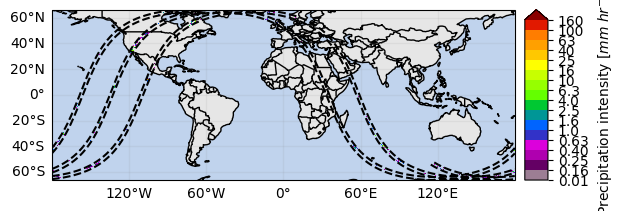

In [ ]:
ds[variable].gpm.plot_map()

You can customize the map projection by passing a `cartopy.crs.Projection` to the subplot. 
The available projections are [listed here]( https://scitools.org.uk/cartopy/docs/latest/reference/projections.html?highlight=projections).

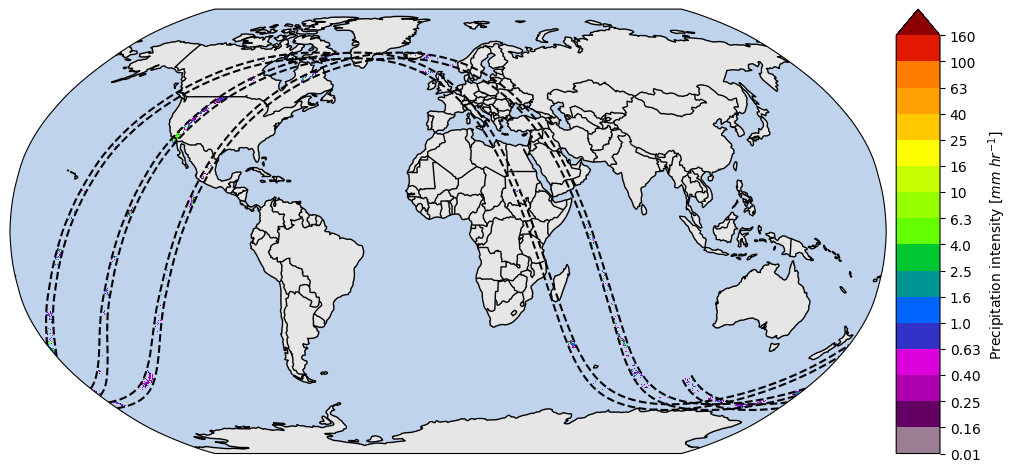

In [ ]:
# Define some figure options
dpi = 100
figsize = (12, 10)

# Example of Cartopy projections
crs_proj = ccrs.Robinson()

# Select a single variable
da = ds[variable]

# Create the map
fig, ax = plt.subplots(subplot_kw={"projection": crs_proj}, figsize=figsize, dpi=dpi)
da.gpm.plot_map(ax=ax, add_labels=False, add_background=True, add_gridlines=False, add_swath_lines=True)
ax.set_global()

By focusing on a narrow region, it's possible to better visualize the spatial field:

Text(0.5, 1.0, '2A-DPR PrecipRateNearSurface')

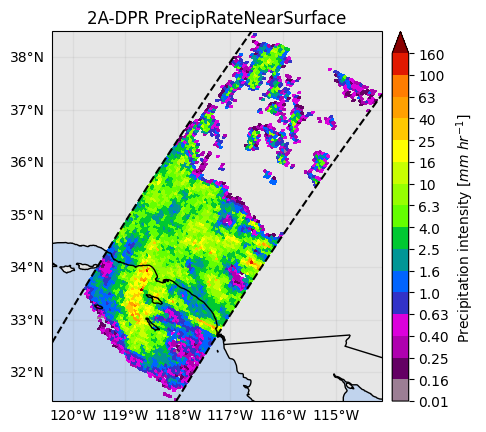

In [ ]:
p = ds[variable].gpm.sel(gpm_id=slice(start_gpm_id, end_gpm_id)).gpm.plot_map()
p.axes.set_title(ds[variable].gpm.title(add_timestep=False))

Using the `gpm.plot_image` method is possible to visualize the data in the so-called "swath scan view":

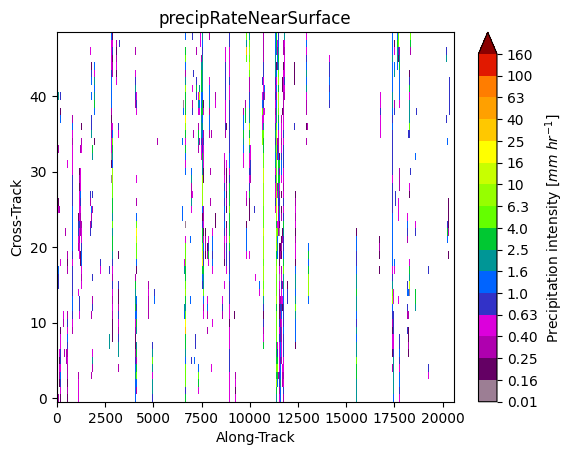

In [ ]:
ds[variable].gpm.plot_image()

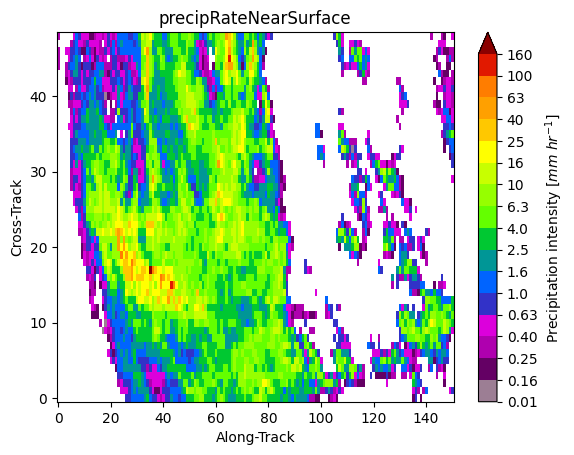

In [ ]:
ds[variable].gpm.sel(gpm_id=slice(start_gpm_id, end_gpm_id)).gpm.plot_image()

When we visualize different product variables, GPM-API will automatically try to use different appropriate colormaps and colorbars. 
You can observe this in the following example:

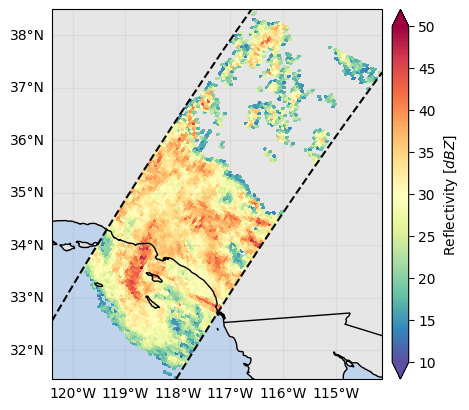

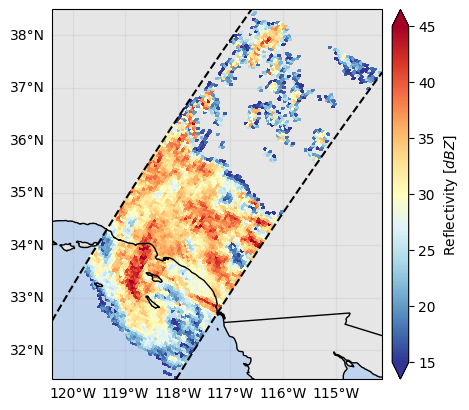

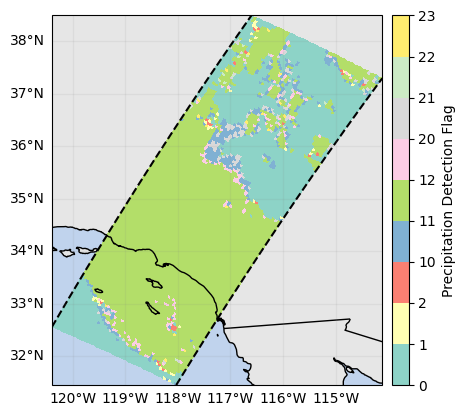

In [ ]:
ds_subset = ds.gpm.sel(gpm_id=slice(start_gpm_id, end_gpm_id), radar_frequency="Ku")
ds_subset["zFactorFinalNearSurface"].gpm.plot_map()
ds_subset["zFactorFinalNearSurface"].gpm.plot_map(
    cmap="RdYlBu_r",
    vmin=15,
    vmax=45,
)  # ex: enable to modify defaults parameters on the fly
ds_subset["flagPrecip"].gpm.plot_map()  # ex: defaults to categorical colorbar

GPM-API provides colormaps and colorbars tailored to GPM product variables with the goal of simplifying the data analysis and make it more reproducible.

The default colormap and colorbar configurations are defined into YAML files into the [gpm/etc/colorbars directory](https://github.com/ghiggi/gpm_api/blob/main/gpm/etc/colorbars/) of the software.

However, users are free to override, add and/or customize the colorbars configurations using the [pycolorbar](https://pycolorbar.readthedocs.io/en/latest/index.html) registry.

The registered colorbar configurations can be displayed using `gpm.colorbars.show_colorbars()` and the `plot_kwargs` and `cbar_kwargs` required to customize the figure can be obtained by calling the `gpm.get_plot_kwargs` function. Here below we provide an example on how to display DPR precipitation rates estimates using the same colorbar used by NASA to display IMERG liquid precipitation estimates.

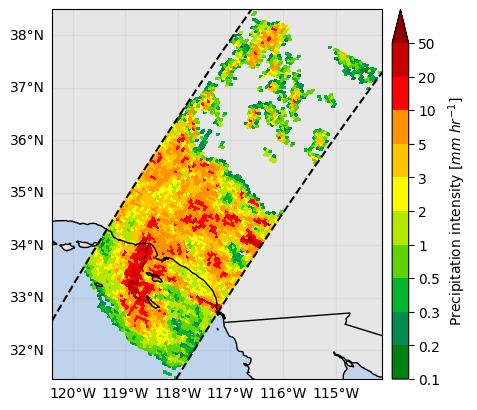

In [ ]:
plot_kwargs, cbar_kwargs = gpm.get_plot_kwargs("IMERG_Liquid")
ds_subset["precipRateNearSurface"].gpm.plot_map(cbar_kwargs=cbar_kwargs, **plot_kwargs)

Since GPM Datasets are characterized by multiple dimensions, GPM-API provides the capabilities to generate FacetGrid Cartopy plots following the classical xarray syntax: 

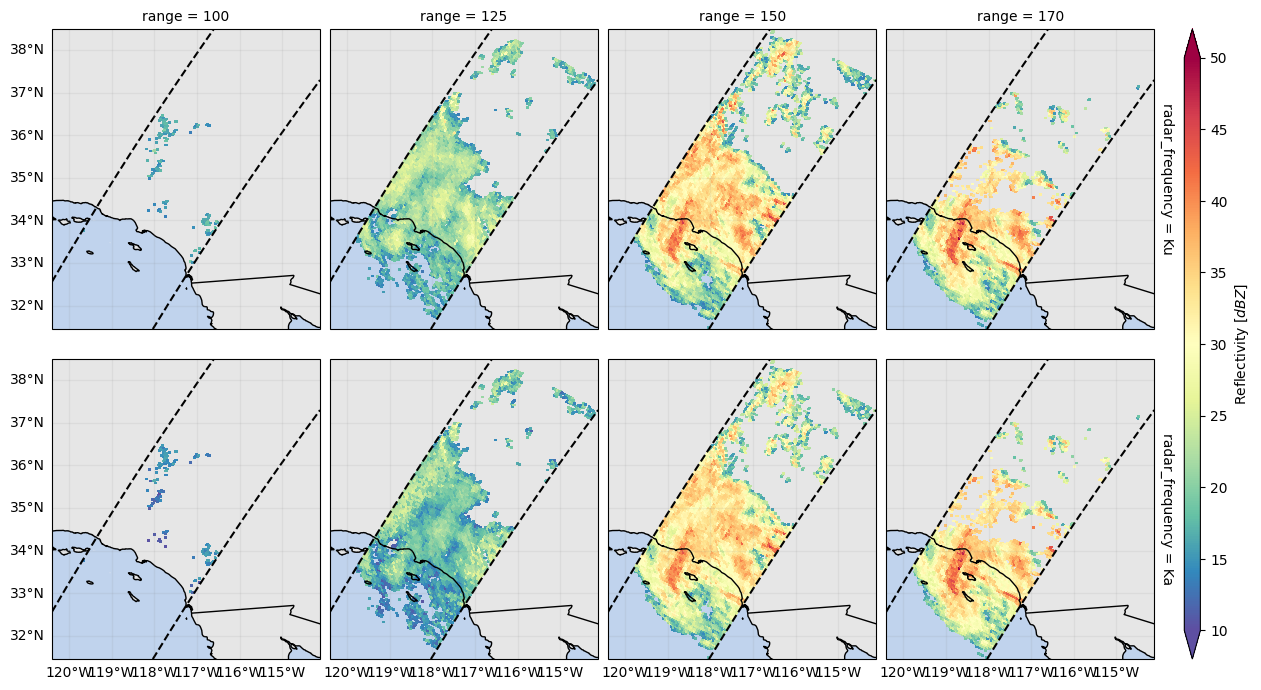

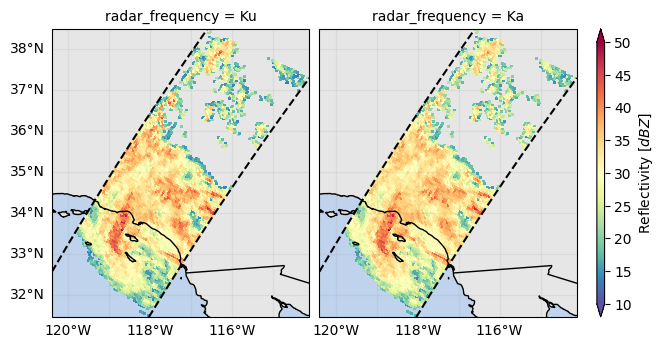

In [ ]:
ds_subset = ds.gpm.sel(gpm_id=slice(start_gpm_id, end_gpm_id))

# Plot reflectivity at various levels
variable = "zFactorFinal"
da = ds_subset[variable].sel(range=[100, 125, 150, 170])
fc = da.gpm.plot_map(row="radar_frequency", col="range")

# Surface reflectivity at Ku and Ka band
variable = "zFactorFinalNearSurface"
da = ds_subset[variable]
fc = da.gpm.plot_map(col="radar_frequency", col_wrap=2)

## 5. Plot Cross-Sections

An easy way to derive a vertical cross-section is to slice the data along the cross-track or along-track dimension.
We can then plot the cross-section calling the `gpm.plot_cross_section()` method.

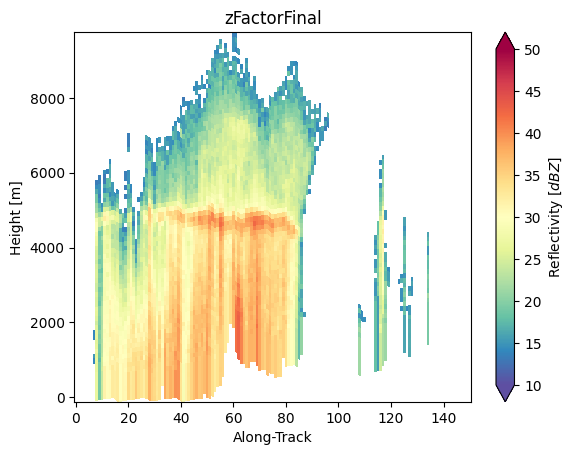

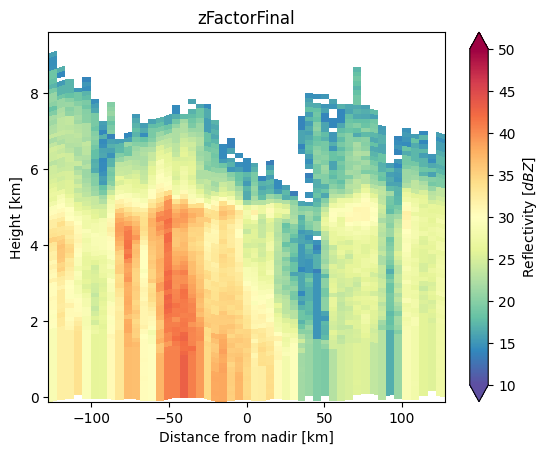

In [ ]:
ds_subset = ds.gpm.sel(
    gpm_id=slice(start_gpm_id, end_gpm_id),
    radar_frequency="Ku",
).compute()
ds_subset["zFactorFinal"].isel(cross_track=24).gpm.plot_cross_section(zoom=True)
ds_subset["zFactorFinal"].isel(along_track=30).gpm.plot_cross_section(
    y="height_km",
    x="horizontal_distance_km",
    zoom=True,
)

The cross-section transect can be visualized calling the `gpm.plot_transect_line` method: 

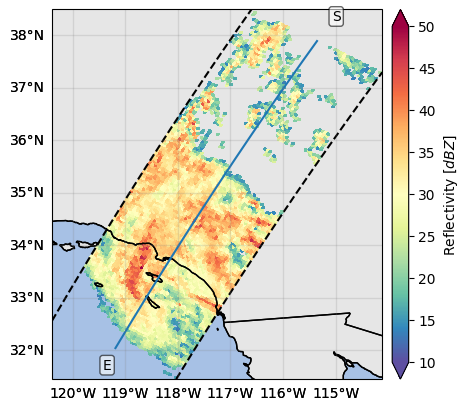

In [ ]:
ds_transect = ds_subset.isel(cross_track=24)
text_kwargs = {
    "bbox": {
        "facecolor": "white",
        "alpha": 0.6,
        "edgecolor": "black",
        "boxstyle": "round,pad=0.2",
    },
}
p = ds_subset["zFactorFinalNearSurface"].gpm.plot_map()
ds_transect.gpm.plot_transect_line(ax=p.axes, text_kwargs=text_kwargs)

The cross-section variables available in a transect dataset can be listed or selected with `gpm.cross_section_variables` or `gpm.select_cross_section_variables()` respectively: 

In [ ]:
ds_transect = ds_subset.isel(cross_track=24)
print(ds_transect.gpm.cross_section_variables)
ds_transect.gpm.select_cross_section_variables()

['DFRforward1', 'Dm', 'Nw', 'airTemperature', 'attenuationNP', 'dBNw', 'epsilon', 'flagEcho', 'flagSLV', 'phase', 'precipRate', 'precipWater', 'zFactorFinal', 'zFactorMeasured']


<xarray.Dataset> Size: 2MB
Dimensions:             (along_track: 151, range: 176)
Coordinates: (12/15)
    sunLocalTime        (along_track) float32 604B 14.2 14.2 ... 14.48 14.48
    height              (along_track, range) float32 106kB 2.193e+04 ... 29.45
    dataQuality         (along_track) float32 604B 0.0 0.0 0.0 ... 0.0 0.0 0.0
    SCorientation       (along_track) float32 604B 0.0 0.0 0.0 ... 0.0 0.0 0.0
    lon                 (along_track) float32 604B -119.2 -119.2 ... -115.4
    lat                 (along_track) float32 604B 32.04 32.08 ... 37.85 37.89
    ...                  ...
    gpm_cross_track_id  int64 8B 24
    gpm_along_track_id  (along_track) int64 1kB 2768 2769 2770 ... 2917 2918
  * range               (range) int64 1kB 1 2 3 4 5 6 ... 172 173 174 175 176
    gpm_range_id        (range) int64 1kB 0 1 2 3 4 5 ... 171 172 173 174 175
    radar_frequency     <U2 8B 'Ku'
    crsWGS84            int64 8B 0
Dimensions without coordinates: along_track
Data variables: (12/14)
    DFRforward1         (along_track, range) float32 106kB nan nan ... nan nan
    Dm                  (along_track, range) float32 106kB nan nan ... nan nan
    Nw                  (along_track, range) float32 106kB nan nan ... nan nan
    airTemperature      (along_track, range) float32 106kB 214.1 213.9 ... 299.4
    attenuationNP       (along_track, range) float32 106kB 0.0 0.0 ... 0.04
    dBNw                (along_track, range) float32 106kB nan nan ... nan nan
    ...                  ...
    flagSLV             (along_track, range) float32 106kB 0.0 0.0 ... -64.0
    phase               (along_track, range) float32 106kB nan nan ... nan nan
    precipRate          (along_track, range) float32 106kB 0.0 0.0 ... nan nan
    precipWater         (along_track, range) float32 106kB 0.0 0.0 ... nan nan
    zFactorFinal        (along_track, range) float32 106kB nan nan ... nan nan
    zFactorMeasured     (along_track, range) float32 106kB nan nan ... nan 10.78
Attributes: (12/23)
    FileName:              2A.GPM.DPR.V9-20211125.20230820-S183436-E200708.05...
    EphemerisFileName:     
    AttitudeFileName:      
    TotalQualityCode:      Good
    DielectricFactorKa:    0.8989
    DielectricFactorKu:    0.9255
    ...                    ...
    DataFormatVersion:     7h
    MetadataVersion:       7h
    ProcessingMode:        STD
    ScanMode:              FS
    history:               Created by ghiggi/gpm_api software on 2025-03-01 2...
    gpm_api_product:       2A-DPR

GPM-API provides accessor methods to facilitate the extraction of cross-section:
- around a point
- between points
- and along a trajectory.

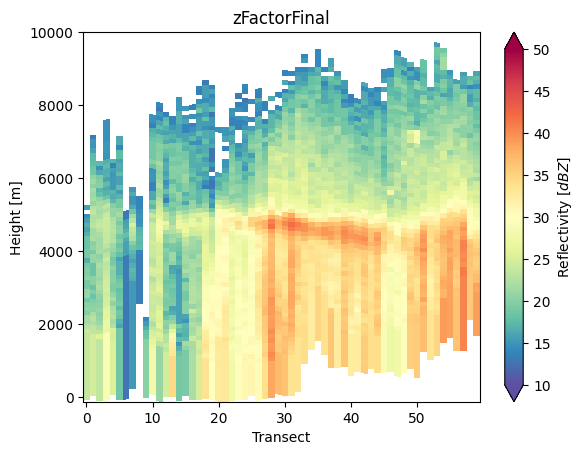

In [ ]:
da_cross = ds_subset["zFactorFinal"].gpm.extract_transect_between_points(
    start_point=(-118, 32),
    end_point=(-118, 36),
    steps=60,
)
da_cross.gpm.plot_cross_section(zoom=True)

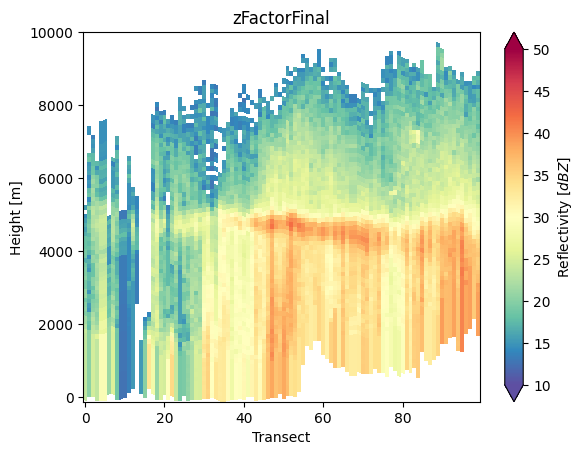

In [ ]:
points = np.ones((100, 2))
points[:, 0] = -118
points[:, 1] = np.linspace(32, 36, 100)
da_cross = ds_subset["zFactorFinal"].gpm.extract_transect_at_points(points=points)
da_cross.gpm.plot_cross_section(zoom=True)

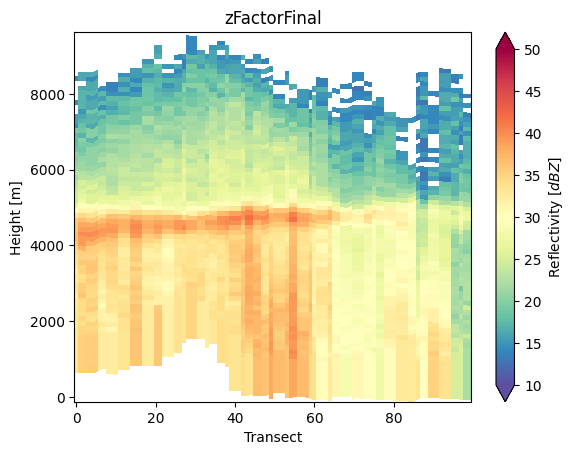

In [ ]:
da_cross = ds_subset["zFactorFinal"].gpm.extract_transect_around_point(
    point=(-118, 34),
    azimuth=0,
    distance=100_000,
    steps=100,
)  # azimuth [0, 360]
da_cross.gpm.plot_cross_section(zoom=True)

## 6. Community-based retrievals

GPM-API aims to be a platform where scientist can share their algorithms and retrievals with the community.

Based on the GPM product you are working with, you will have a series of retrievals available to you.
For example, GPM-API currently provides the following retrievals for the 2A-DPR product:

In [ ]:
ds.gpm.available_retrievals()

['EchoDepth',
 'EchoTopHeight',
 'HailKineticEnergy',
 'MESH',
 'MESHS',
 'POH',
 'POSH',
 'REFC',
 'REFCH',
 'SHI',
 'VIL',
 'VILD',
 'bright_band_ratio',
 'c_band_tan',
 'dfrFinal',
 'dfrFinalNearSurface',
 'dfrMeasured',
 'flagHydroClass',
 'flagPrecipitationType',
 'gate_resolution',
 'gate_volume',
 'heightClutterFreeBottom',
 'heightRealSurfaceKa',
 'heightRealSurfaceKu',
 'range_distance_from_ellipsoid',
 'range_distance_from_satellite',
 'range_resolution',
 's_band_cao2013',
 'x_band_tan']

The `gpm.retrieve` method enables you to apply specific retrievals to your dataset.
Here below we provide a couple of examples: 

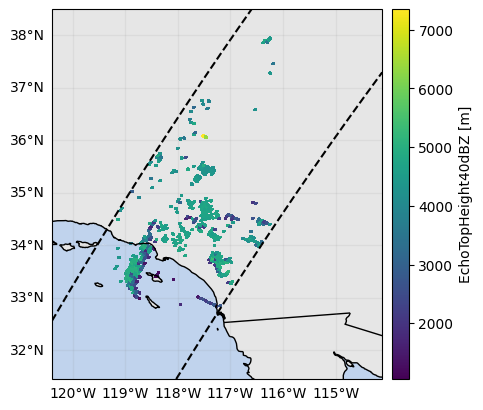

In [ ]:
ds_subset = ds.gpm.sel(
    gpm_id=slice(start_gpm_id, end_gpm_id),
    radar_frequency="Ku",
).compute()

ds_subset["EchoTopHeight40dBZ"] = ds_subset.gpm.retrieve("EchoTopHeight", threshold=40)
ds_subset["EchoTopHeight40dBZ"].gpm.plot_map()

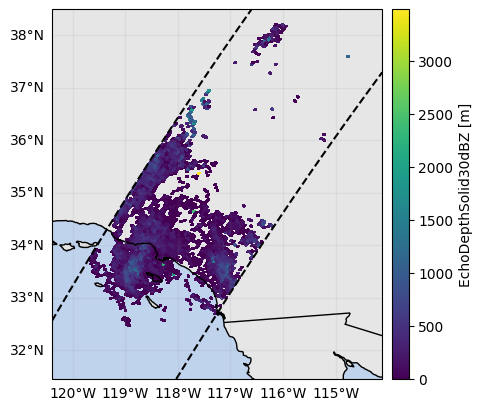

In [ ]:
ds_subset["EchoDepthSolid30dBZ"] = ds_subset.gpm.retrieve(
    "EchoDepth",
    threshold=30,
    mask_liquid_phase=True,
)
ds_subset["EchoDepthSolid30dBZ"].gpm.plot_map()

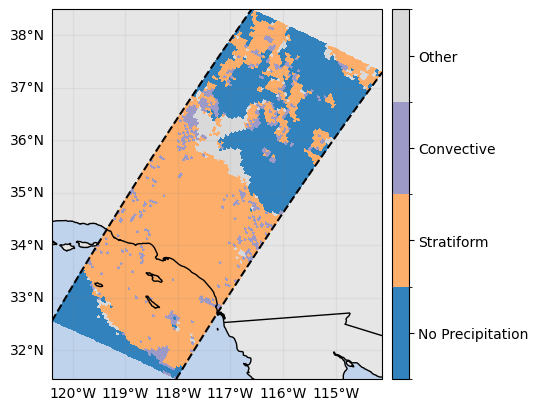

In [ ]:
ds_subset["flagPrecipitationType"] = ds_subset.gpm.retrieve(
    "flagPrecipitationType",
    method="major_rain_type",
)
ds_subset["flagPrecipitationType"].gpm.plot_map()

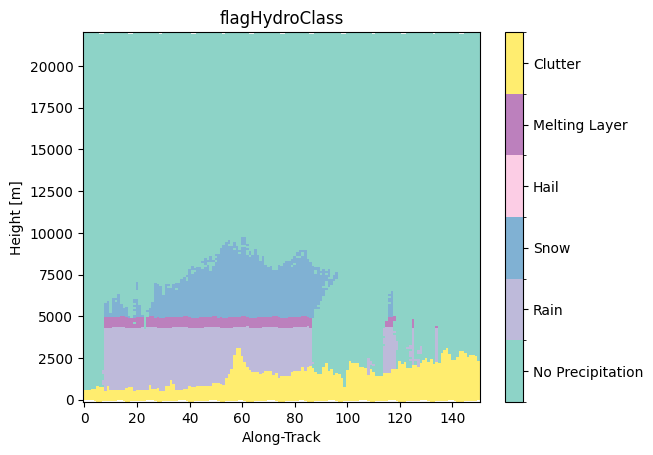

In [ ]:
ds_subset["flagHydroClass"] = ds_subset.gpm.retrieve(
    "flagHydroClass",
)  # this return a 3D array !
ds_subset["flagHydroClass"].isel(cross_track=24).gpm.plot_cross_section()

## 7. Advanced Manipulations 

When working with spaceborne radar data, it is often necessary to slice, extract or mask portions of data across the `range` dimension. 
The xarray `gpm` accessor provides a series of methods to facilitate various tasks.

If you wish to extract the values at specific range gate position varying over each radar beam, you can use the `slice_range_at_bin` method. 
For example, to extract values near the surface where radar gates are not more contaminated by ground clutter, you can use the bin variable `"binClutterFreeBottom"`:

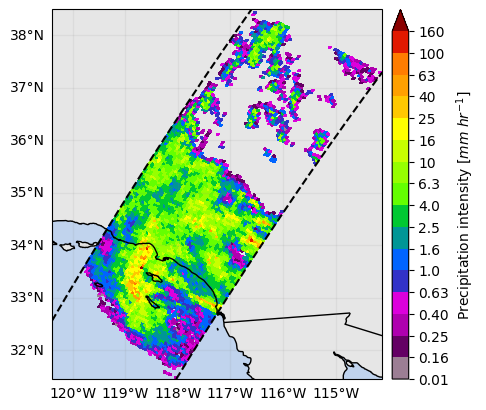

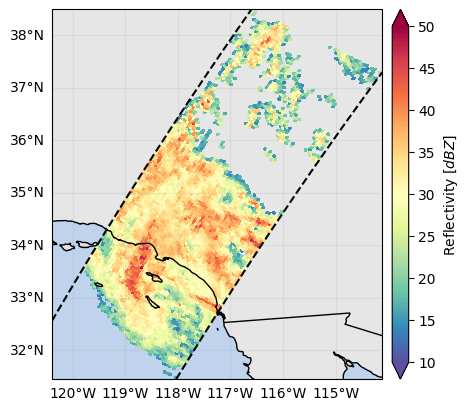

In [ ]:
ds_surface = ds_subset.gpm.slice_range_at_bin(
    bins="binClutterFreeBottom",
)  # or ds.gpm.slice_range_at_bin(bins=ds["binClutterFreeBottom"])
ds_surface["precipRate"].gpm.plot_map()  # precipRate is originally a 3D variable !
ds_surface["zFactorFinal"].gpm.plot_map()  # zFactorFinal is originally a 3D variable !

Other slicing methods provide capabilities to retrieve values at a given height, along isothermals, or at the range gates where the minimum, maximum or closest value of a given variable occur:

In [ ]:
ds_isothermal = ds_subset.gpm.slice_range_at_temperature(
    273.15,
)  # use by default the airTemperature variable
ds_3000 = ds_subset.gpm.slice_range_at_height(3000)
ds_max_z = ds_subset.gpm.slice_range_at_max_value(variable="zFactorFinal")
ds_min_z = ds_subset.gpm.slice_range_at_min_value(variable="zFactorFinal")
ds_at_z_30 = ds_subset.gpm.slice_range_at_value(variable="zFactorFinal", value=30)

If you want to focus your analysis in the portion of radar gates with valid values (e.g., excluding upper atmosphere regions without reflectivities) or values ranging in a specific interval of interest, you can use the `subset_range_with_valid_data` and `subset_range_where_values` methods respectively:

In [ ]:
ds_valid = ds_subset.gpm.subset_range_with_valid_data(variable="zFactorFinal")
ds_intense = ds_subset.gpm.subset_range_where_values(
    variable="precipRate",
    vmin=200,
    vmax=300,
)  # mm/hr
print("Range with valid data:", ds_valid["range"].data)
print("Range with intense precipitation:", ds_intense["range"].data)

Range with valid data: [ 93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164
 165 166 167 168 169 170 171 172 173 174 175 176]
Range with intense precipitation: [166 167 168 169 170 171 172 173 174 175 176]


If you wish to extract radar gates above/below spatially-varying bin position, you can use the `extract_dataset_above_bin` and `extract_dataset_below_bin` methods. 
Please note that these methods shifts the arrays beam-wise, returning datasets with a new `range` coordinate and the bin variables updated accordingly.

In [ ]:
ds_below_melting_layer = ds_subset.gpm.extract_dataset_below_bin(
    "binBBBottom",
)  # the first new range index corresponds to original binBBBottom
ds_above_melting_layer = ds_subset.gpm.extract_dataset_above_bin(
    "binBBTop",
)  # the last new range index corresponds to original binBBTop

If instead you wish to mask the data above/below or in between radar gates positions, you can use the `mask_above_bin`, `mask_below_bin` and `mask_between_bins` methods:

In [ ]:
ds_rain = ds_subset.gpm.mask_above_bin("binZeroDeg")
ds_snow = ds_subset.gpm.mask_below_bin("binZeroDeg")
ds_masked_melting_layer = ds_subset.gpm.mask_between_bins(
    bottom_bins="binBBBottom",
    top_bins="binBBTop",
)

## 8. Geospatial Manipulations

GPM-API provides methods to easily spatially subset orbits by extent, country or continent.

Note however, that an area can be crossed by multiple orbits depending on the size of your GPM satellite dataset. 
In other words, multiple orbit slices in along-track direction can intersect the area of interest. 

The method `get_crop_slices_by_extent`, `get_crop_slices_by_country` and ` get_crop_slices_by_continent` enable to retrieve the orbit portions intersecting the area of interest. 

[{'along_track': slice(3040, 4143, None)}, {'along_track': slice(10973, 12352, None)}, {'along_track': slice(18905, 20509, None)}]
[{'along_track': slice(3040, 4143, None)}, {'along_track': slice(10973, 12352, None)}, {'along_track': slice(18905, 20509, None)}]


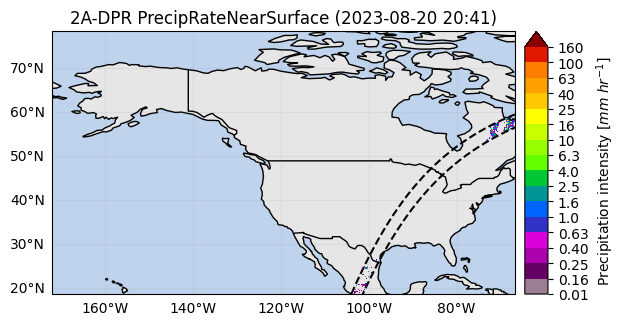

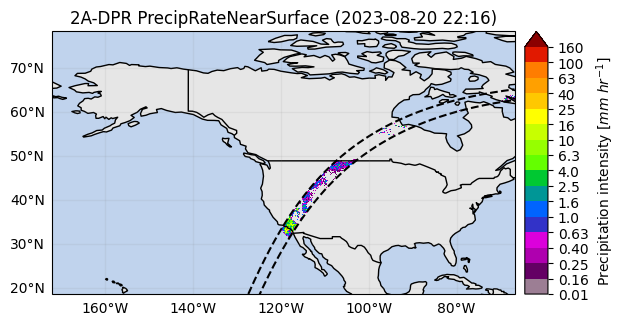

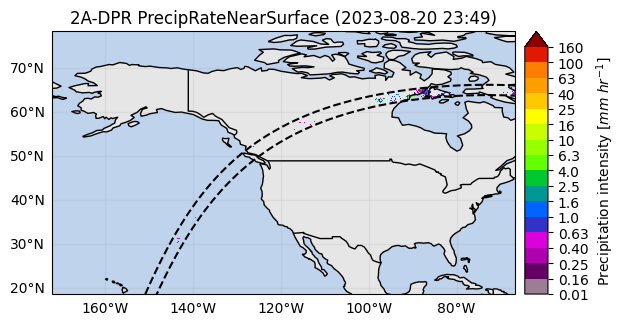

In [ ]:
# Define the variable to display
variable = "precipRateNearSurface"

# Crop by country
list_isel_dict = ds.gpm.get_crop_slices_by_country("United States")
print(list_isel_dict)

# Crop by extent
extent = get_country_extent("United States")
list_isel_dict = ds.gpm.get_crop_slices_by_extent(extent)
print(list_isel_dict)

# Plot the swaths crossing the country
for isel_dict in list_isel_dict:
    da_subset = ds[variable].isel(isel_dict)
    slice_title = da_subset.gpm.title(add_timestep=True)
    p = da_subset.gpm.plot_map()
    p.axes.set_extent(extent)
    p.axes.set_title(label=slice_title)

Alternatively, if yourare working with a single granule, you can use the following methods:

In [ ]:
# ds_subset = ds.gpm.crop(extent)
# ds_subset = ds.gpm.crop_by_country("United States")

You can also easily obtain the extent around a given point (i.e. ground radar location) using the `get_geographic_extent_around_point` function and use 
the gpm accessor methods `get_crop_slices_around_point` or `crop_around_point` to subset your dataset:

[{'along_track': slice(11298, 11399, None)}]
[{'along_track': slice(11298, 11399, None)}]


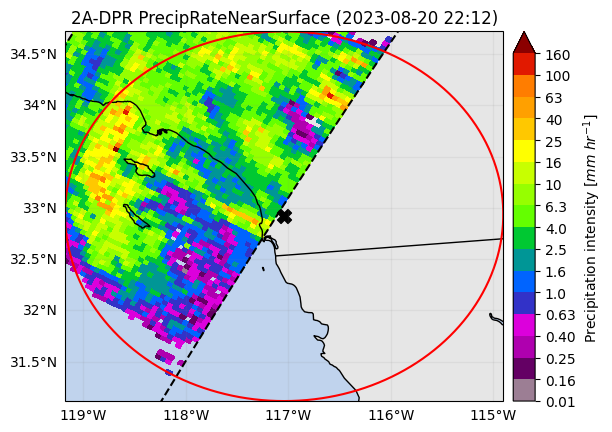

In [ ]:
# Define the variable to display
variable = "precipRateNearSurface"

# Crop around a point (i.e. radar location)
lon = -117.0418
lat = 32.9190
distance = 200_000  # 200 km
list_isel_dict = ds.gpm.get_crop_slices_around_point(
    lon=lon,
    lat=lat,
    distance=distance,
)
print(list_isel_dict)

extent = get_geographic_extent_around_point(lon=lon, lat=lat, distance=distance)
list_isel_dict = ds.gpm.get_crop_slices_by_extent(extent)
print(list_isel_dict)

# Define ROI coordinates
circle_lons, circle_lats = get_circle_coordinates_around_point(
    lon,
    lat,
    radius=distance,
    num_vertices=360,
)

# Plot the swaths crossing the ROI
for isel_dict in list_isel_dict:
    da_subset = ds[variable].isel(isel_dict)
    slice_title = da_subset.gpm.title(add_timestep=True)
    p = da_subset.gpm.plot_map()
    p.axes.set_title(slice_title)
    p.axes.plot(circle_lons, circle_lats, "r-", transform=ccrs.Geodetic())
    p.axes.scatter(lon, lat, c="black", marker="X", s=100, transform=ccrs.Geodetic())
    p.axes.set_extent(extent)

# Alternatives if working with a single granule:

# ds_subset = ds.gpm.crop_around_point(lon=lon, lat=lat, distance=distance)

Please keep in mind that you can easily retrieve the extent of a GPM xarray object using the `extent` method. 

The optional argument `padding` allows to expand/shrink the geographic extent by custom lon/lat degrees, while the `size` argument allows 
to obtain an extent centered on the GPM object with the desired size.

In [ ]:
print(da_subset.gpm.extent(padding=0.1))  # expanding
print(da_subset.gpm.extent(padding=-0.1))  # shrinking
print(da_subset.gpm.extent(size=0.5))
print(da_subset.gpm.extent(size=0))  # centroid

Extent(xmin=-120.85270843505859, xmax=-115.86820831298829, ymin=30.720465087890624, ymax=35.94685516357422)
Extent(xmin=-120.6527084350586, xmax=-116.06820831298828, ymin=30.920465087890626, ymax=35.74685516357422)
Extent(xmin=-118.61045837402344, xmax=-118.11045837402344, ymin=33.08366012573242, ymax=33.58366012573242)
Extent(xmin=-118.36045837402344, xmax=-118.36045837402344, ymin=33.33366012573242, ymax=33.33366012573242)


## 9. Storm Labeling

Using the xarray `ximage` accessor, it is possible to easily delineate (label) the precipitating areas. The label array is added to the dataset as a new coordinate.

The array currently contains 121 labels and 'max_n_labels'
            is set to 50. The colorbar is not displayed!


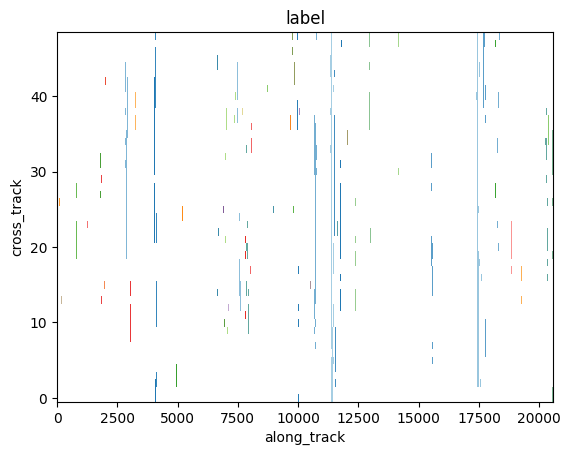

In [ ]:
# Retrieve labeled xarray object
label_name = "label"
ds = ds.ximage.label(
    variable="precipRateNearSurface",
    min_value_threshold=1,
    min_area_threshold=5,
    footprint=5,  # assign same label to precipitating areas 5 pixels apart
    sort_by="area",  # "maximum", "minimum", <custom_function>
    sort_decreasing=True,
    label_name=label_name,
)
# Plot full label array
ds[label_name].ximage.plot_labels()

Let's zoom in a specific region:

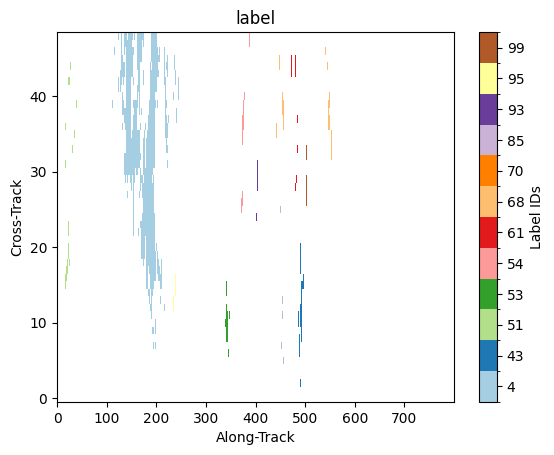

In [ ]:
gpm.plot_labels(ds[label_name].isel(along_track=slice(2700, 3500)))

## 10. Patch Extraction

With the xarray `ximage` accessor, it is also possible to extract patches around the precipitating areas. Here we provide a minimal example on how to proceed:

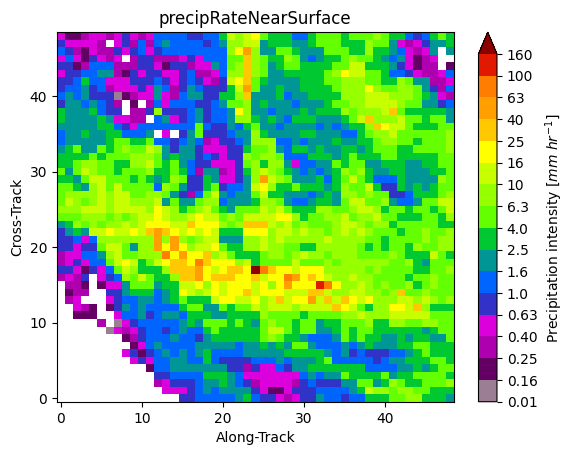

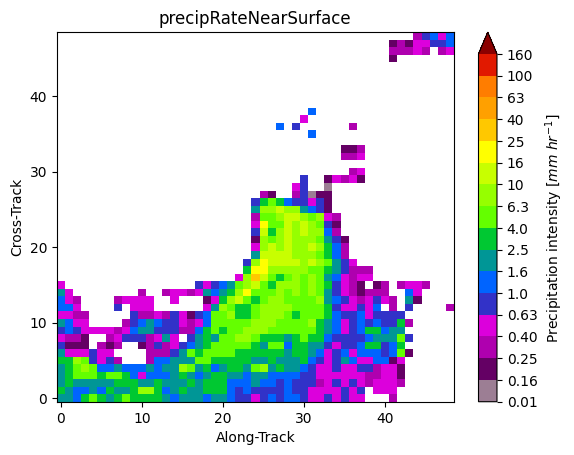

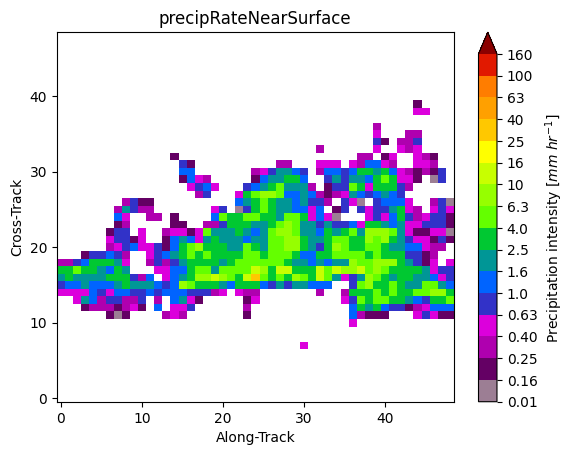

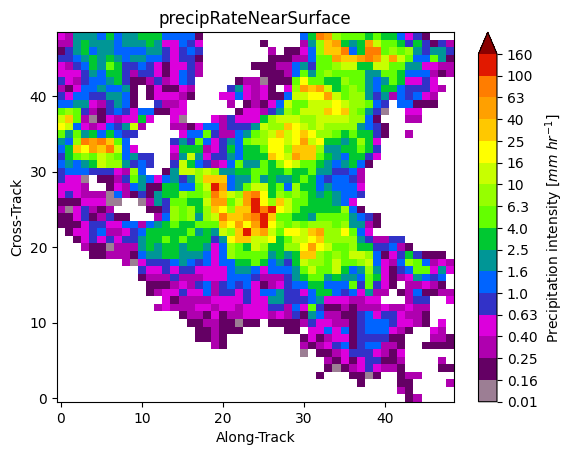

In [ ]:
# Define the patch generator
da_patch_gen = ds["precipRateNearSurface"].ximage.label_patches(
    label_name=label_name,
    patch_size=(49, 49),
    # Output options
    n_patches=4,
    # Patch extraction Options
    padding=0,
    centered_on="max",
    # Tiling/Sliding Options
    debug=False,
    verbose=False,
)

# # Retrieve list of patches
list_label_patches = list(da_patch_gen)
list_da = [da for label, da in list_label_patches]

# Display patches
gpm.plot_patches(list_label_patches)

You can exploit the xarray manipulations and FacetGrid capabilities to quickly create the following figure:

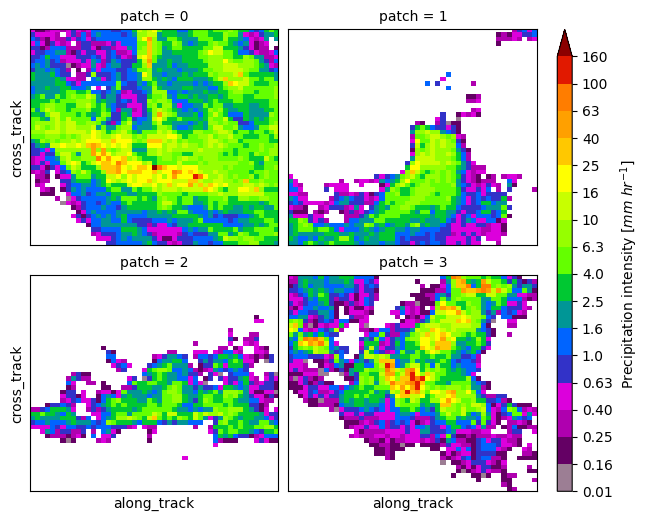

In [ ]:
list_da_without_coords = [da.drop_vars(["lon", "lat"]) for da in list_da]
da_patch = xr.concat(list_da_without_coords, dim="patch")
da_patch.isel(patch=slice(0, 4)).gpm.plot_image(col="patch", col_wrap=2)